# __Springboard Data Science Capstone 3 Project__
# _Predicting the Price of Energy_

### Data Wrangling & Exploratory Data Analysis

##### _Ben Takacs_
###### __Python version 3.10.4__

### __Imports and File Location__

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from functions import load_table_data, load_csv_data, arima_mse, model_eval, decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

datapath = './data/'

### __Load Relevant Tables from Data Set__

4.3 - Consumption by Sector \
9.8 - Average price of electricity to ultimate customers

In [3]:
df43 = load_table_data('4-3.csv')
df98 = load_table_data('9-8.csv')

Data loaded from: 4-3.csv
Data loaded from: 9-8.csv


## __Data Wrangling__

### __Table 4.3 - Consumption by Sector__

In [4]:
print(df43.info(), '\n\n\n', df43.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 621 entries, 1973-01-01 to 2024-09-01
Data columns (total 12 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Natural Gas Consumed by the Residential Sector                                 621 non-null    float64
 1   Natural Gas Consumed by the Commercial Sector                                  621 non-null    float64
 2   Natural Gas Consumed by the Industrial Sector, Lease and Plant Fuel            621 non-null    float64
 3   Natural Gas Consumed by the Other Industrial Sector, CHP                       429 non-null    float64
 4   Natural Gas Consumed by the Other Industrial Sector, Non-CHP                   621 non-null    float64
 5   Natural Gas Consumed by the Other Industrial Sector, Total                     621 non-null    float64
 6   Natural

Focusing on Residential and Commercial sectors, so keep only those columns

In [5]:
df43 = df43.drop(columns=df43.columns[2:])
df43

,Natural Gas Consumed by the Residential Sector,Natural Gas Consumed by the Commercial Sector
Month,,
1973-01-01,843.900,392.315
1973-02-01,747.331,394.281
1973-03-01,648.504,310.799
1973-04-01,465.867,231.943
1973-05-01,326.313,174.258
...,...,...
2024-05-01,171.858,176.062
2024-06-01,122.740,153.302
2024-07-01,107.035,146.175


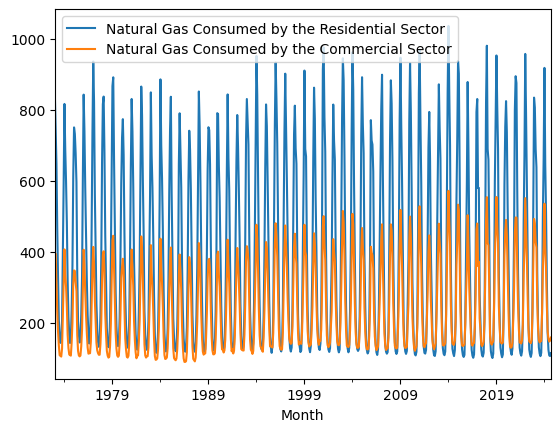

In [6]:
fig = df43.plot()
# fig.legend().set_visible(False)
plt.show()

See much larger variability in residential sector as compared to commercial

### __Table 9.8 - Average Price of Electricity to Ultimate Customers__

In [7]:
df98

,"Average Price of Electricity to Ultimate Customers, Residential","Average Price of Electricity to Ultimate Customers, Commercial","Average Price of Electricity to Ultimate Customers, Industrial","Average Price of Electricity to Ultimate Customers, Transportation","Average Price of Electricity to Ultimate Customers, Other","Average Price of Electricity to Ultimate Customers, Total"
Month,,,,,,
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-05-01,16.43,12.48,7.88,12.21,NaN,12.55
2024-06-01,16.42,13.07,8.40,12.74,NaN,13.23
2024-07-01,16.63,13.58,8.81,13.15,NaN,13.76


In [8]:
print(df98.info())
print(df98.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 585 entries, 1976-01-01 to 2024-09-01
Data columns (total 6 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Average Price of Electricity to Ultimate Customers, Residential     507 non-null    float64
 1   Average Price of Electricity to Ultimate Customers, Commercial      507 non-null    float64
 2   Average Price of Electricity to Ultimate Customers, Industrial      507 non-null    float64
 3   Average Price of Electricity to Ultimate Customers, Transportation  261 non-null    float64
 4   Average Price of Electricity to Ultimate Customers, Other           156 non-null    float64
 5   Average Price of Electricity to Ultimate Customers, Total           507 non-null    float64
dtypes: float64(6)
memory usage: 32.0 KB
None
Average Price of Electricity to Ultimate Customers, Res

In [12]:
# Check what total column is
today = '2024-07-01'
df98.loc[today]
print(df98.drop(columns=df98.columns[:-1]).loc[today].mean())
print(df98['Average Price of Electricity to Ultimate Customers, Total'].loc[today])

13.76
13.76


Total column is average of other columns. But we'll just focus on residential and commercial

In [14]:
df98 = df98.drop(columns=df98.columns[2:])
df98

,"Average Price of Electricity to Ultimate Customers, Residential","Average Price of Electricity to Ultimate Customers, Commercial"
Month,,
1976-01-01,NaN,NaN
1976-02-01,NaN,NaN
1976-03-01,NaN,NaN
1976-04-01,NaN,NaN
1976-05-01,NaN,NaN
...,...,...
2024-05-01,16.43,12.48
2024-06-01,16.42,13.07
2024-07-01,16.63,13.58


<Figure size 640x480 with 0 Axes>

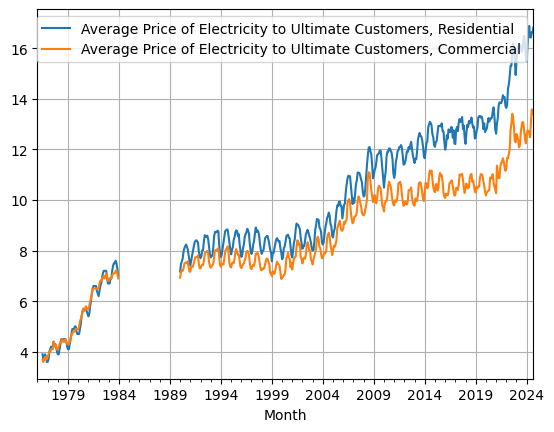

In [15]:
plt.figure()
df98.plot()
plt.grid(True)
plt.show()

Just take data from beyond ~1989

In [16]:
df98[('1989-1-1' < df98.index) & (df98.index < '1991-1-1')]

,"Average Price of Electricity to Ultimate Customers, Residential","Average Price of Electricity to Ultimate Customers, Commercial"
Month,,
1989-02-01,NaN,NaN
1989-03-01,NaN,NaN
1989-04-01,NaN,NaN
1989-05-01,NaN,NaN
1989-06-01,NaN,NaN
1989-07-01,NaN,NaN
1989-08-01,NaN,NaN
1989-09-01,NaN,NaN
1989-10-01,NaN,NaN


NaN values end 1989-12-1, so take values beyond 1990

In [17]:
df98 = df98[df98.index > '1990']
df98

,"Average Price of Electricity to Ultimate Customers, Residential","Average Price of Electricity to Ultimate Customers, Commercial"
Month,,
1990-02-01,7.48,7.15
1990-03-01,7.57,7.23
1990-04-01,7.69,7.20
1990-05-01,7.96,7.31
1990-06-01,8.10,7.49
...,...,...
2024-05-01,16.43,12.48
2024-06-01,16.42,13.07
2024-07-01,16.63,13.58


<Axes: xlabel='Month'>

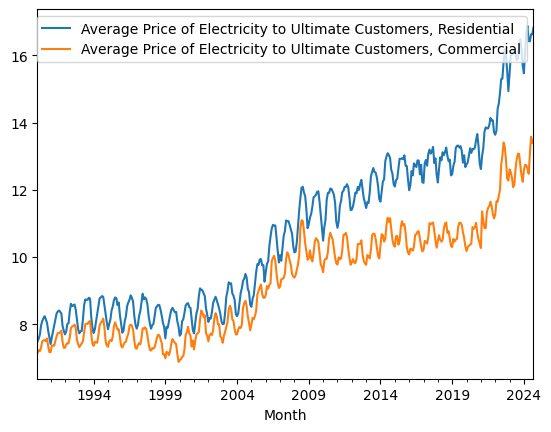

In [18]:
df98.plot()

If needed later we can truncate df43 to values after 1990 as well.

Final dataframes

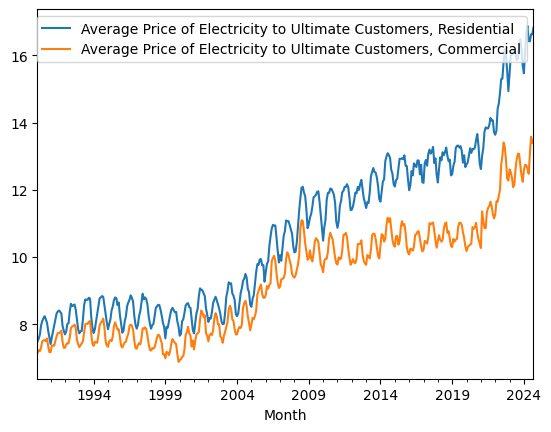

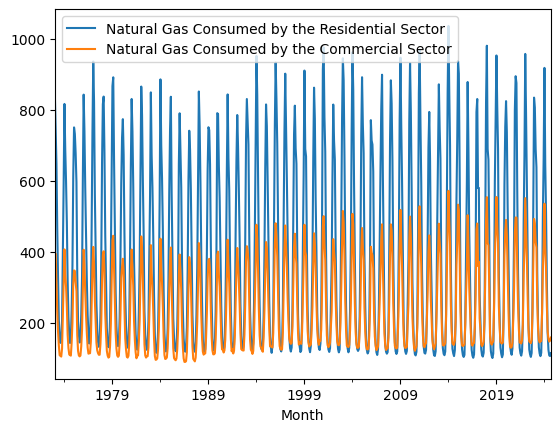

In [19]:
df98.plot()
df43.plot()
plt.show()

### __Save Data__

In [20]:
df43.to_csv(datapath + 'df43.csv')
df98.to_csv(datapath + 'df98.csv')

## __Exploratory Data Analysis__

### Average price of electricity to ultimate customers, commercial

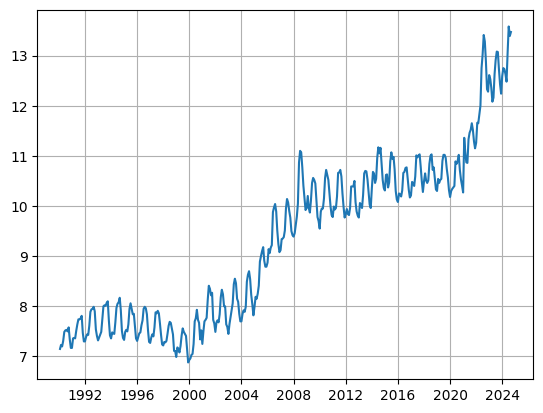

In [21]:
y98c = df98['Average Price of Electricity to Ultimate Customers, Commercial']

plt.figure()
plt.plot(y98c)
plt.grid(True)
plt.show()

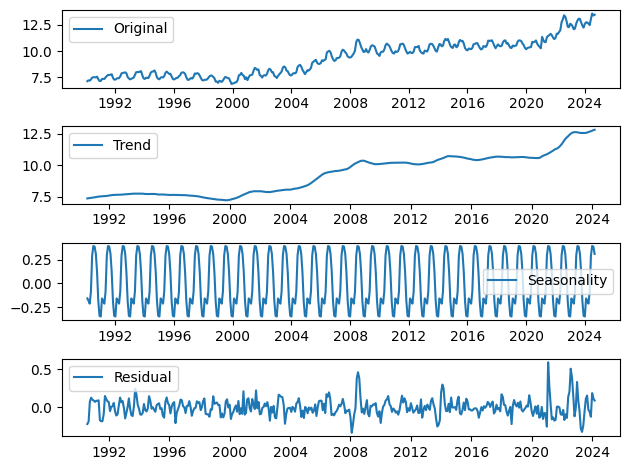

KPSS Probability: 0.01


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_41959/2540204679.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y98c)[1]))


In [22]:
# Check for stationarity of data
decomposition(y98c)
print('KPSS Probability: {}'.format(kpss(y98c)[1]))

p < 0.05, reject null hypothesis (stationary data), so we must transform it to be stationary by differencing

In [19]:
# y98c_d = pd.DataFrame(y98c.diff().dropna())
y98c_d = np.diff(y98c)
print('KPSS Probability: {}'.format(kpss(y98c_d)[1]))

KPSS Probability: 0.1


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_22409/694795797.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y98c_d)[1]))


p > 0.05, fail to reject null hypothesis, so data is stationary and ready to be modeled. 

### Residential

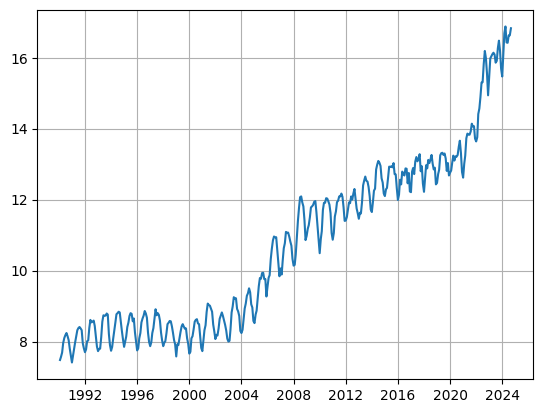

In [23]:
y98r = df98['Average Price of Electricity to Ultimate Customers, Residential']

plt.figure()
plt.plot(y98r)
plt.grid(True)
plt.show()

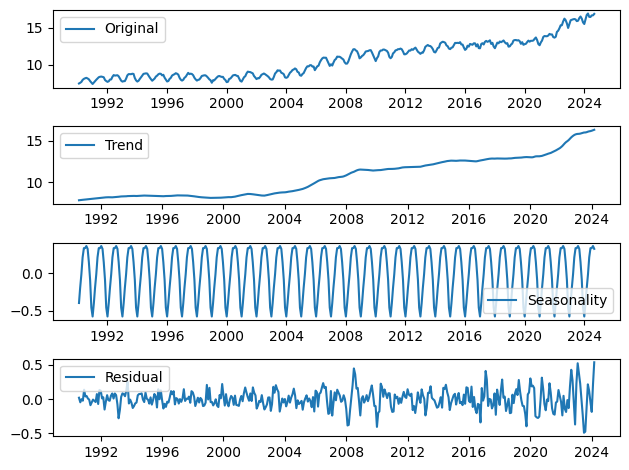

KPSS Probability: 0.01


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_41959/2007027840.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y98r)[1]))


In [24]:
decomposition(y98r)
print('KPSS Probability: {}'.format(kpss(y98r)[1]))

In [25]:
y98r_d = np.diff(y98r)
print('KPSS Probability: {}'.format(kpss(y98r_d)[1]))

KPSS Probability: 0.1


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_41959/465628779.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y98r_d)[1]))


p > 0.05, fail to reject null hypothesis, so data is now stationary and ready to be modeled. 

## Natural gas consumed by residential sector

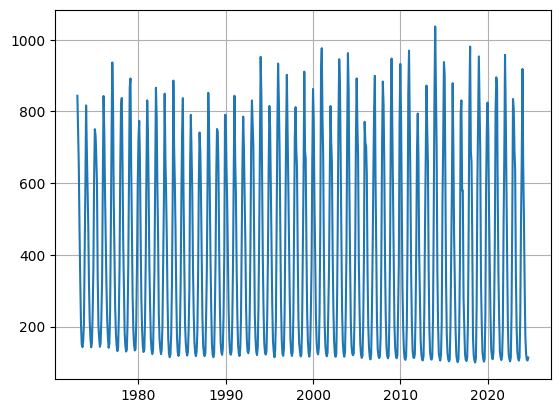

In [26]:
y43r = df43['Natural Gas Consumed by the Residential Sector']

plt.figure()
plt.plot(y43r)
plt.grid(True)
plt.show()

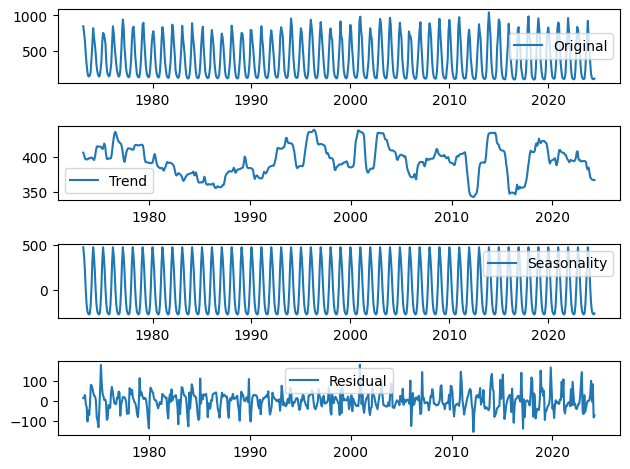

KPSS Probability: 0.1


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_41959/2695942772.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y43r)[1]))


In [27]:
decomposition(y43r)
print('KPSS Probability: {}'.format(kpss(y43r)[1]))

data are stationary

## Natural gas consumed by commercial sector

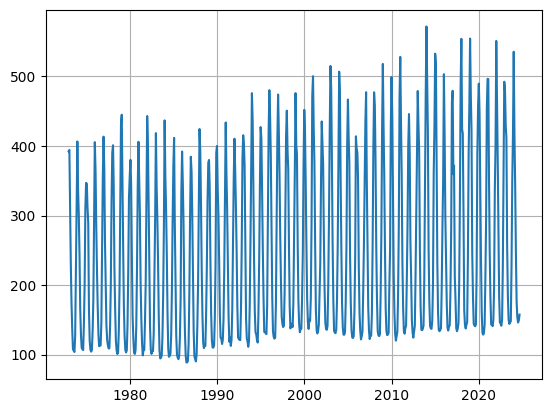

In [28]:
y43c = df43['Natural Gas Consumed by the Commercial Sector']

plt.figure()
plt.plot(y43c)
plt.grid(True)
plt.show()

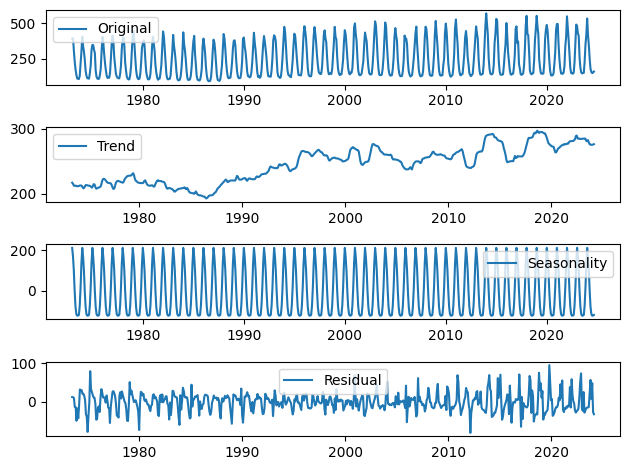

KPSS Probability: 0.01


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_41959/3807229378.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y43c)[1]))


In [29]:
decomposition(y43c)
print('KPSS Probability: {}'.format(kpss(y43c)[1]))

In [30]:
y43r_d = np.diff(y43r)
print('KPSS Probability: {}'.format(kpss(y43r_d)[1]))

KPSS Probability: 0.1


/var/folders/qj/vjvpkp3d3rq87m_14mc70r_00000gn/T/ipykernel_41959/2338951983.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print('KPSS Probability: {}'.format(kpss(y43r_d)[1]))


data are stationary

## __Check for Trends in Data__

In [33]:
df = pd.merge(left=df43, right=df98, left_index=True, right_index=True)

In [34]:
df

,Natural Gas Consumed by the Residential Sector,Natural Gas Consumed by the Commercial Sector,"Average Price of Electricity to Ultimate Customers, Residential","Average Price of Electricity to Ultimate Customers, Commercial"
Month,,,,
1990-02-01,642.665,335.911,7.48,7.15
1990-03-01,551.987,302.022,7.57,7.23
1990-04-01,399.624,236.272,7.69,7.20
1990-05-01,248.272,157.645,7.96,7.31
1990-06-01,160.823,124.086,8.10,7.49
...,...,...,...,...
2024-05-01,171.858,176.062,16.43,12.48
2024-06-01,122.740,153.302,16.42,13.07
2024-07-01,107.035,146.175,16.63,13.58


<Axes: xlabel='Average Price of Electricity to Ultimate Customers, Commercial', ylabel='Natural Gas Consumed by the Commercial Sector'>

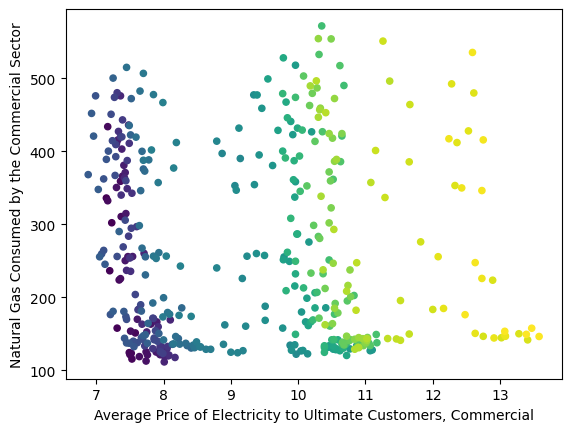

In [35]:
df.plot.scatter('Average Price of Electricity to Ultimate Customers, Commercial', 'Natural Gas Consumed by the Commercial Sector', c=df.index)

<Axes: xlabel='Average Price of Electricity to Ultimate Customers, Residential', ylabel='Natural Gas Consumed by the Residential Sector'>

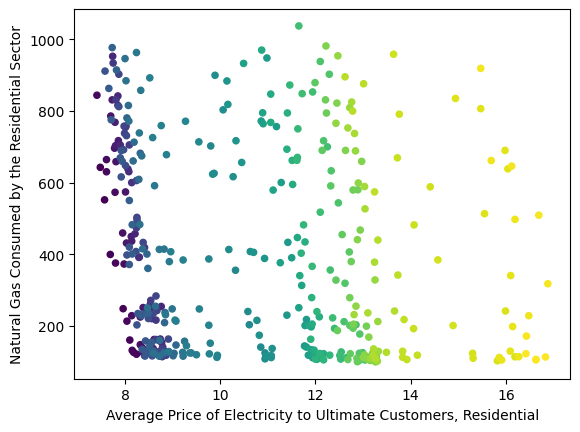

In [36]:
df.plot.scatter('Average Price of Electricity to Ultimate Customers, Residential', 'Natural Gas Consumed by the Residential Sector', c=df.index)

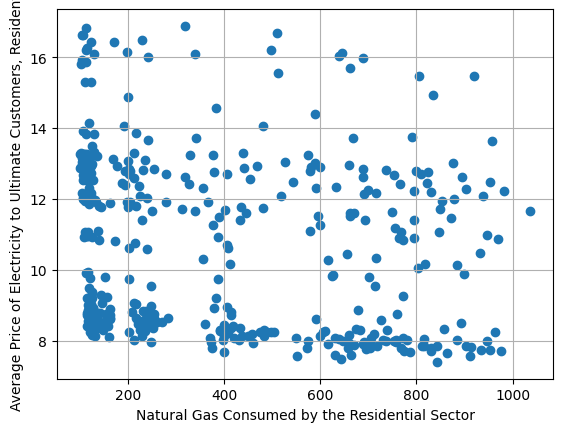

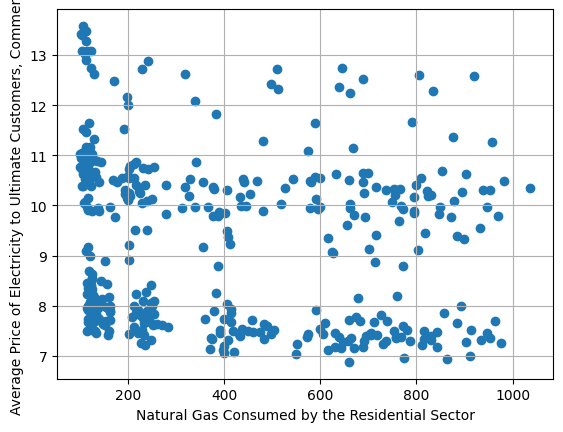

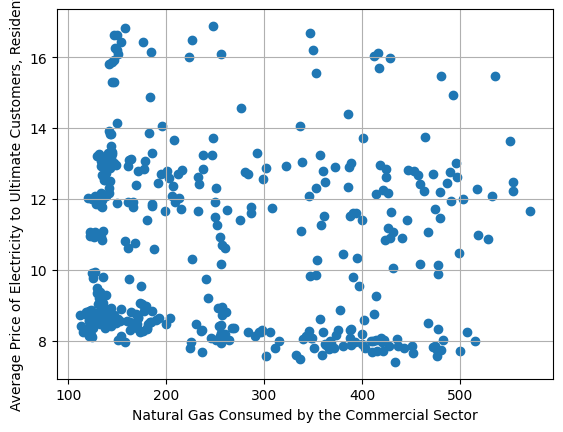

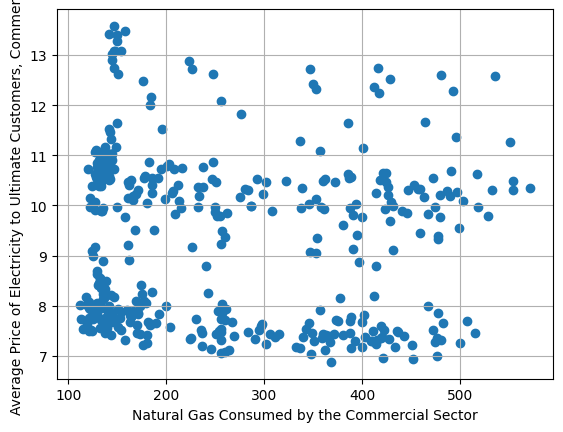

In [37]:
for i in range(2):
    for j in range(2):
        # if i != j:
        plt.figure()
        plt.scatter(df.iloc[:, i], df.iloc[:, j+2])
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j+2])
        plt.grid(True)
        plt.show()
        # else:
        #     continue

In [38]:
df38 = load_table_data('3-8a.csv')
df38 = df38['Total Petroleum Consumed by the Residential Sector']

Data loaded from: 3-8a.csv


In [58]:
dfc1 = pd.read_excel('./data/Table C1.xlsx', skiprows=[x for x in range(8)] + [9], index_col=0, header=[0])
dfc1.set_index(pd.to_datetime(dfc1.index, format='%Y'), inplace=True)

In [59]:
dfc1

,"Total Resident Population, United States","Total Resident Population, World",United States Share of World Population,"U.S. Gross Domestic Product, Nominal","U.S. Gross Domestic Product, Real",U.S. Gross Domestic Product Implicit Price Deflator,"U.S. Gross Output, Nominal Dollars"
Year,,,,,,,
1949-01-01,149.2,Not Available,Not Available,272.5,2261.9,0.12046,510.3
1950-01-01,152.3,2558,6,299.8,2458.5,0.12195,577.8
1951-01-01,154.9,2595.8,6,346.9,2656.3,0.13060,654.6
1952-01-01,157.6,2637.9,6,367.3,2764.8,0.13286,686.0
1953-01-01,160.2,2683.3,6,389.2,2894.4,0.13447,739.2
...,...,...,...,...,...,...,...
2019-01-01,328.2,7685.6,4.3,21521.4,20692.1,1.04008,37676.5
2020-01-01,331.5,7765,4.3,21323.0,20234.1,1.05381,36681.0
2021-01-01,332.0,7837.6,4.2,23594.0,21407.7,1.10213,41665.3


In [39]:
df38

Month
1973-01-01    436.556
1973-02-01    375.287
1973-03-01    283.839
1973-04-01    205.866
1973-05-01    167.675
               ...   
2024-05-01     53.691
2024-06-01     40.900
2024-07-01     31.619
2024-08-01     30.332
2024-09-01     41.386
Name: Total Petroleum Consumed by the Residential Sector, Length: 621, dtype: float64

In [40]:
df = pd.merge(left=df, right=df38, left_index=True, right_index=True)

In [41]:
df

,Natural Gas Consumed by the Residential Sector,Natural Gas Consumed by the Commercial Sector,"Average Price of Electricity to Ultimate Customers, Residential","Average Price of Electricity to Ultimate Customers, Commercial",Total Petroleum Consumed by the Residential Sector
Month,,,,,
1990-02-01,642.665,335.911,7.48,7.15,143.972
1990-03-01,551.987,302.022,7.57,7.23,129.117
1990-04-01,399.624,236.272,7.69,7.20,108.024
1990-05-01,248.272,157.645,7.96,7.31,94.930
1990-06-01,160.823,124.086,8.10,7.49,87.671
...,...,...,...,...,...
2024-05-01,171.858,176.062,16.43,12.48,53.691
2024-06-01,122.740,153.302,16.42,13.07,40.900
2024-07-01,107.035,146.175,16.63,13.58,31.619


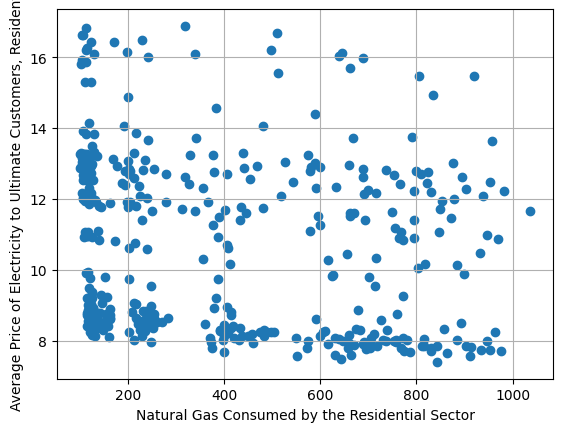

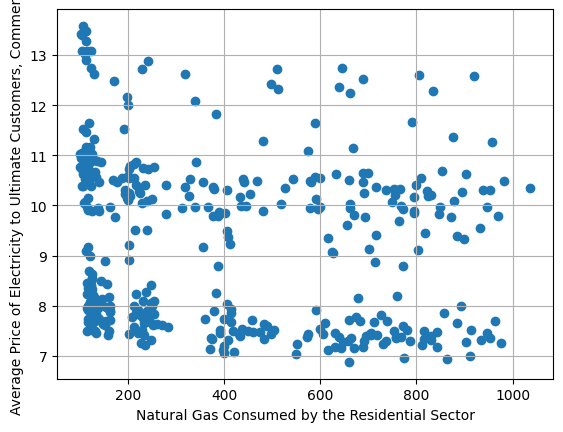

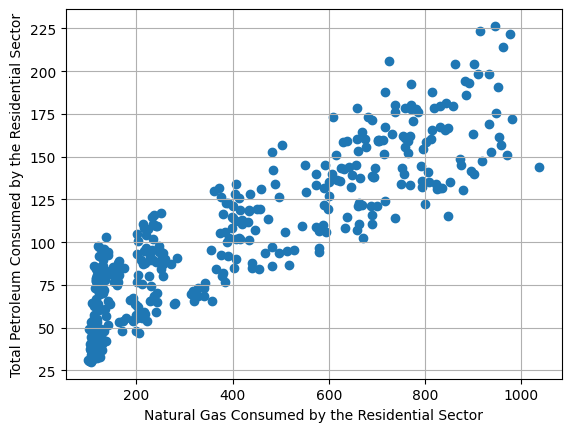

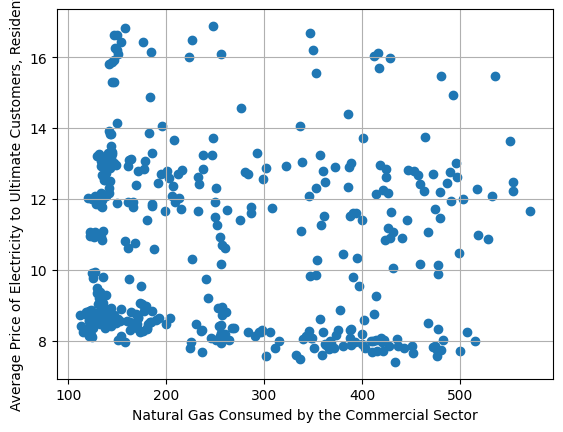

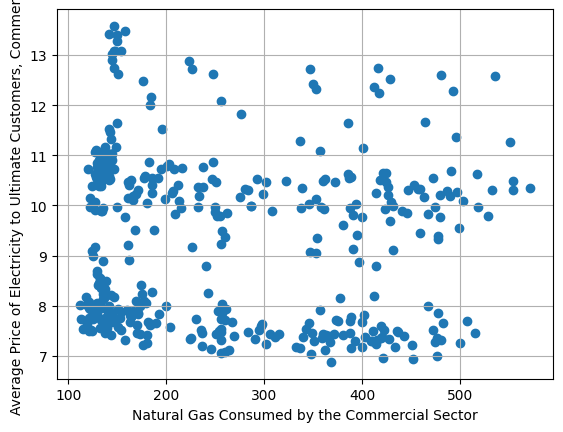

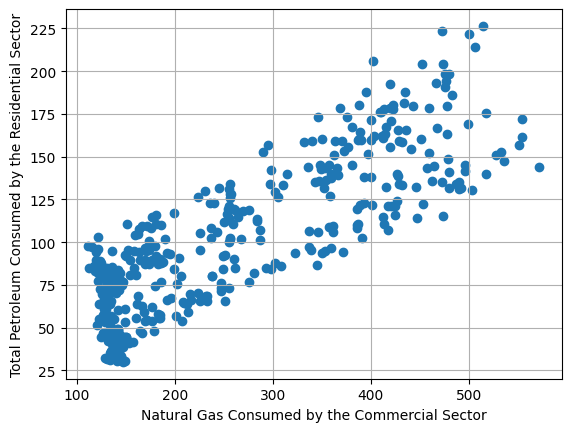

In [42]:
for i in range(2):
    for j in range(3):
        # if i != j:
        plt.figure()
        plt.scatter(df.iloc[:, i], df.iloc[:, j+2])
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j+2])
        plt.grid(True)
        plt.show()
        # else:
        #     continue